In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Cargar el conjunto de datos desde Excel
# Especifica la hoja que se desea cargar
hechos = pd.read_excel("homicidios.xlsx", sheet_name="HECHOS")
victimas = pd.read_excel("homicidios.xlsx", sheet_name="VICTIMAS")


In [3]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [5]:
# Resumen estadístico de los datos
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [7]:
# Resumen estadístico de los datos
victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


**Tratamiento de valores faltantes:** Durante este proceso, se identificaron los valores faltantes en el datasets y se tomaron decisiones para manejarlos de manera adecuada.

+ *Altura* (referente a la altura de la arteria donde ocurrió el incidente), se observa que la mayoría de los registros carecen de esta información. Por lo tanto, se opta por eliminar esta columna, considerando que su ausencia no impactará significativamente en el análisis.

+ *Cruce* indica la ubicación del incidente en esquinas, se decide reemplazar los valores faltantes con "No esquina". Esta elección se realiza con la intención de preservar la integridad de los datos y mantener la posibilidad de utilizar esta información en análisis posteriores.

+ *Calle* se identifica una única fila sin datos. Decido eliminar esta fila para mantener la consistencia del conjunto de datos.

+ *Dirección Normalizada* se completa la información en el archivo Excel, siguiendo el patrón establecido por las calles. Se resalta en amarillo cualquier dato agregado con este propósito.

In [7]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [8]:
# Obtener todos los valores únicos en la columna 'Cruce'
hechos['Cruce'].unique()

array(['FERNANDEZ DE LA CRUZ, F., GRAL. AV.', 'DE LOS CORRALES AV.', nan,
       'VILLEGAS, CONRADO, GRAL.', 'SAENZ PE?A, LUIS, PRES.',
       'ESCALADA AV.', 'GONZALEZ, JOAQUIN V.', 'IRIGOYEN, BERNARDO DE',
       'VERA', 'QUINQUELA MARTIN, BENITO', 'JANER, ANA MARIA',
       'GARCIA GRANDE DE ZEQUEIRA, SEVERO', 'CURAPALIGUE',
       'ALSINA, ADOLFO', '27 DE FEBRERO AV.', 'VEDIA', 'DIAZ, AVELINO',
       '9 DE JULIO AV.', 'DEHEZA', 'ROCA, CNEL. AV.',
       'BONAVENA, OSCAR NATALIO', 'CALLAO AV.', 'VALLE, ARISTOBULO DEL',
       'QUIRNO', 'ZUVIRIA', 'PUEYRREDON AV.', 'RIVERA INDARTE AV.',
       'MURGUIONDO', 'BALBASTRO', 'DEL LIBERTADOR AV.', 'DORREGO AV.',
       'OLAZABAL AV.', 'PAZ, GRAL. AV.', 'FIGUEROA ALCORTA, PRES. AV.',
       'LIMA', 'CARRASCO AV.', 'ESPINOSA', 'SARAZA', 'FILIBERTO',
       'SCAPINO, RODOLFO', 'MIRALLA', 'CAMARONES', 'ALEM, LEANDRO N. AV.',
       'JUJUY AV.', 'UDAONDO, GUILLERMO AV.', 'RIVADAVIA AV.', 'MACHAIN',
       'PUAN', 'TUCUMAN', 'EREZCANO', 'FALCON

In [30]:
# Reemplazar los valores nulos en la columna 'Cruce' por "No esquina"
hechos['Cruce'] = hechos['Cruce'].fillna("No esquina")
# Eliminar la columna 'Altura'
hechos.drop(columns=['Altura'], inplace=True)
# Eliminar las filas con valores nulos en la columna 'Calle'
hechos = hechos.dropna(subset=['Calle'])

In [31]:
hechos.isnull().sum()  #verifico que mis datos nos tienen nulos

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

 - Análisis de distribución de variables: Visualizamos la distribución de las variables numéricas y categóricas. 
 - Variables Numéricas: uso histogramas para visualizar la distribución de variables numéricas como "N_VICTIMAS", "AAAA", "MM", "DD", "pos x" y "pos y".
 - Variables Categóricas: uso gráficos de barras para visualizar la distribución de variables categóricas como "LUGAR_DEL_HECHO", "TIPO_DE_CALLE", "VICTIMA", "ACUSADO", etc.

In [33]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No esquina,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


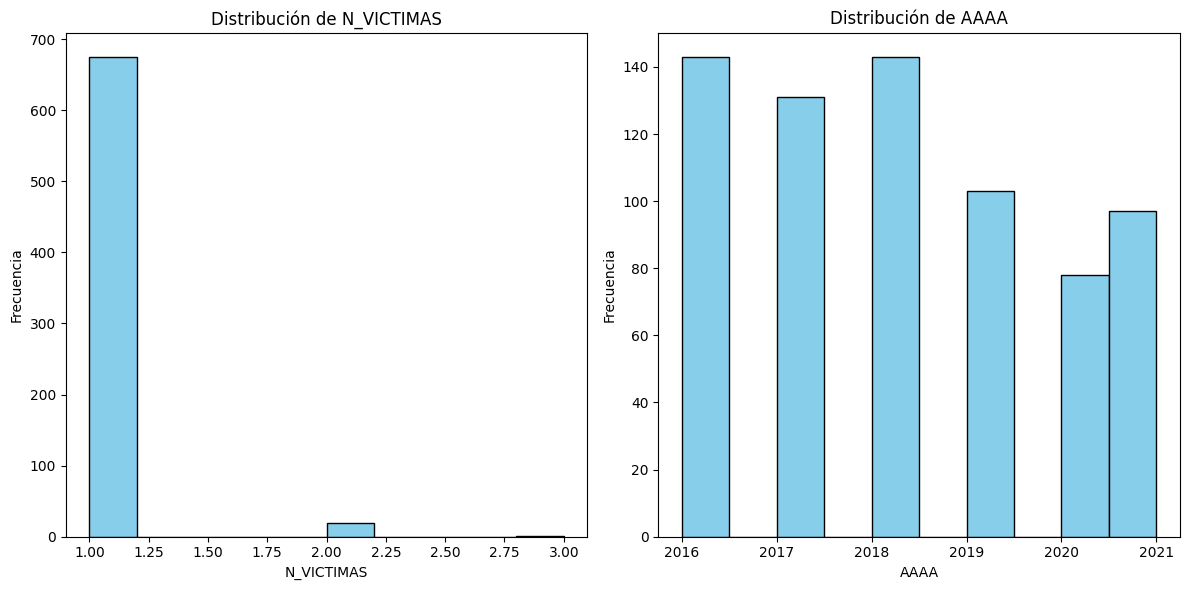

In [48]:
# Crear una figura y ejes para subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de N_VICTIMAS
axs[0].hist(hechos['N_VICTIMAS'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de N_VICTIMAS')
axs[0].set_xlabel('N_VICTIMAS')
axs[0].set_ylabel('Frecuencia')

# Histograma de AAAA
axs[1].hist(hechos['AAAA'], bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Distribución de AAAA')
axs[1].set_xlabel('AAAA')
axs[1].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subtramas
plt.tight_layout()
plt.show()

Exploración de relaciones entre variables: Analiza las relaciones entre variables utilizando gráficos de dispersión, diagramas de caja, etc.

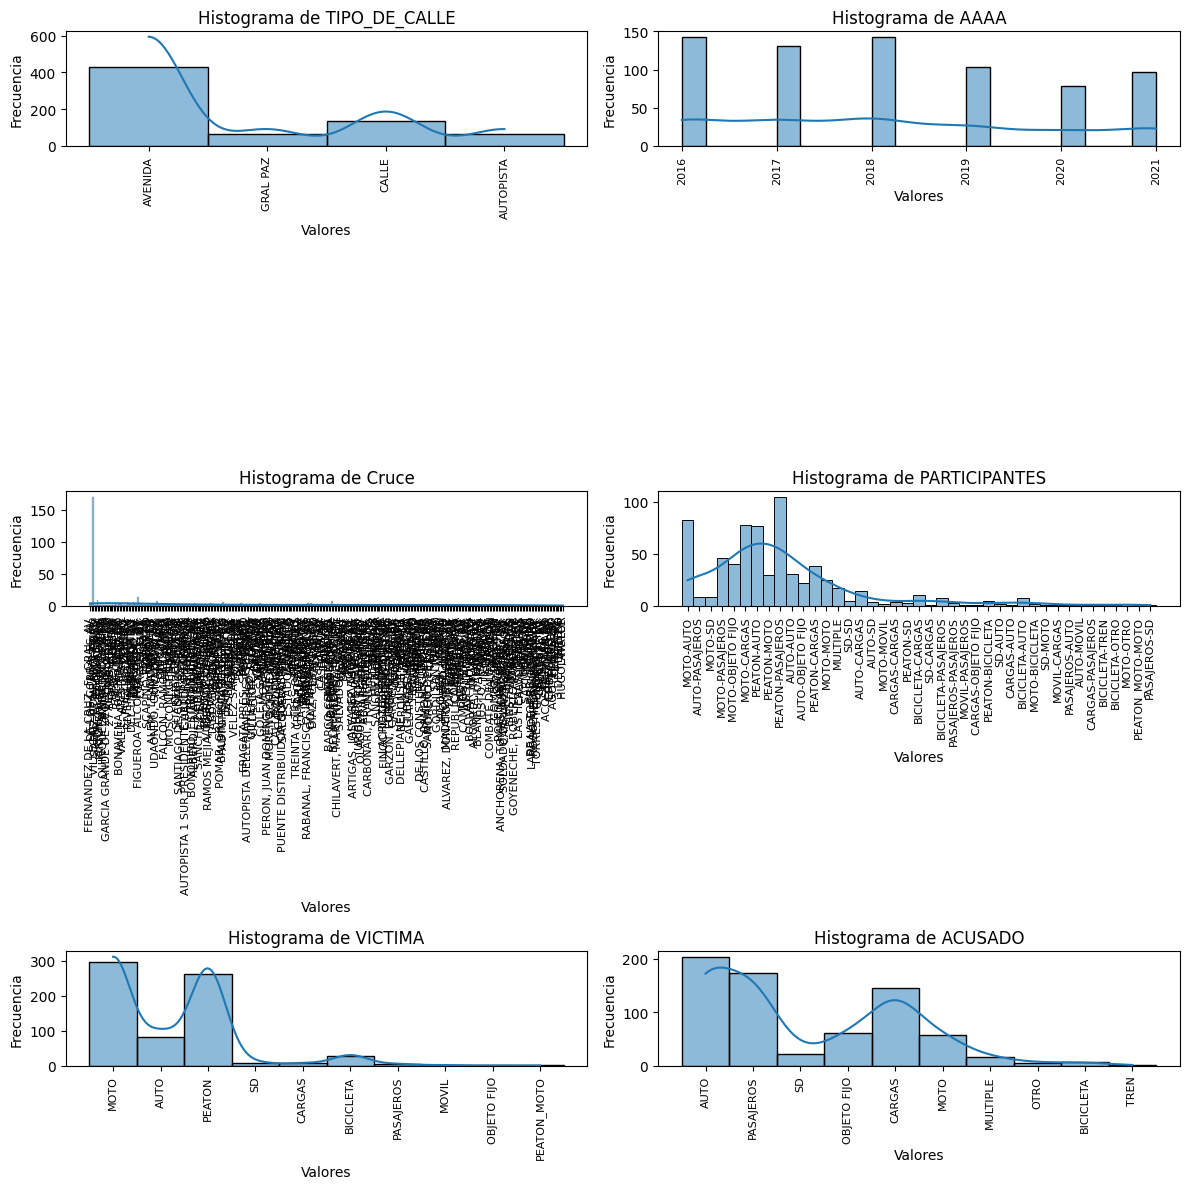

In [43]:
# Crear una figura y ejes para subtramas
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Visualización de datos
columnas = ['TIPO_DE_CALLE','AAAA', 'Cruce', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']
for i, columna in enumerate(columnas):
    fila = i // 2
    columna_grafico = i % 2
    sns.histplot(hechos[columna], bins=20, kde=True, ax=axs[fila, columna_grafico])
    axs[fila, columna_grafico].set_title(f'Histograma de {columna}')
    axs[fila, columna_grafico].set_xlabel('Valores')
    axs[fila, columna_grafico].set_ylabel('Frecuencia')
    axs[fila, columna_grafico].tick_params(axis='x', labelrotation=45, labelsize=8) # Ajustar la leyenda del eje X para que esté en vertical y con letra más pequeña

# Ajustar el espaciado entre subtramas
plt.tight_layout()
plt.show()

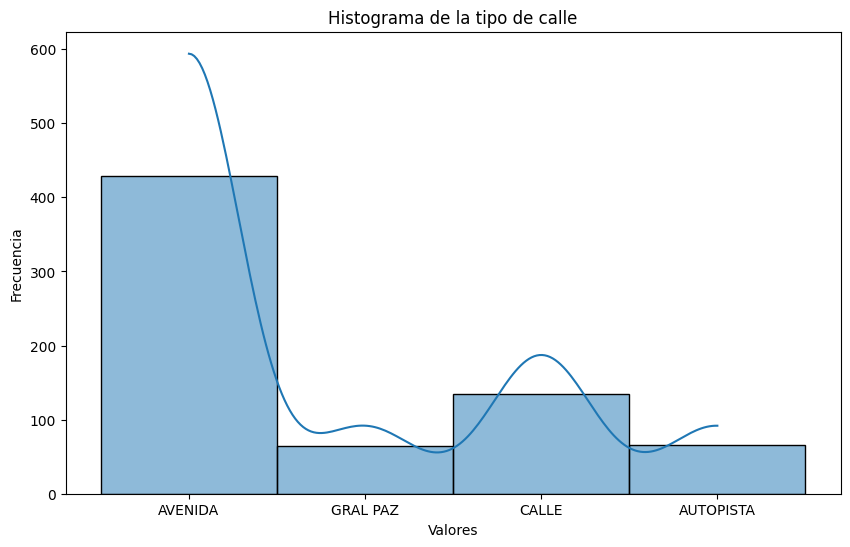

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(hechos['TIPO_DE_CALLE'], bins=20, kde=True)
plt.title('Histograma de la tipo de calle')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Se observa una frecuencia significativa de los datos en tipo de calle avenida y en esquinas. 
Se podrian pensar medidas para mejoras...
Instalación de Semáforos Inteligentes
Colocar señales de tránsito más visibles y claras en avenidas y esquinas.
Incluir señales luminosas y de advertencia en zonas de alta frecuencia de accidentes.
Implementar zonas de velocidad reducida en áreas con alta frecuencia de accidentes.
Utilizar reductores de velocidad (badenes) y radares de control de velocidad.
Cruces Peatonales Seguros.
Mejora del Alumbrado Público.

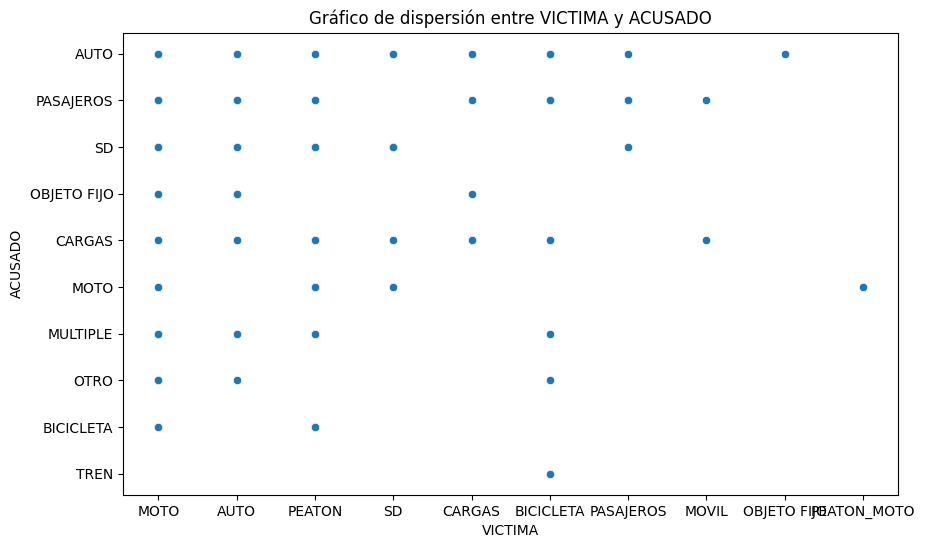

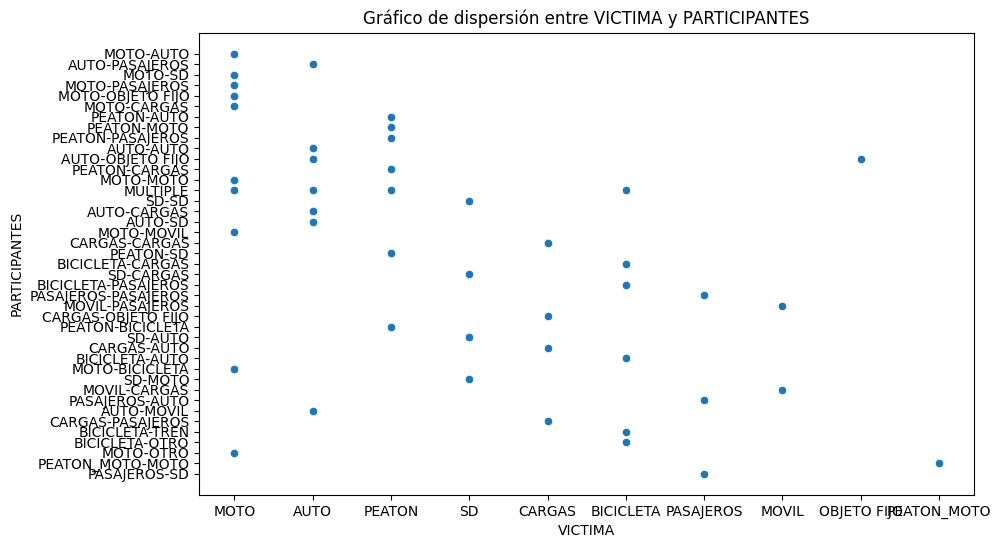

In [44]:
# un gráfico de dispersión entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VICTIMA', y='ACUSADO', data=hechos)
plt.title('Gráfico de dispersión entre VICTIMA y ACUSADO')
plt.xlabel('VICTIMA')
plt.ylabel('ACUSADO')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='VICTIMA', y='PARTICIPANTES', data=hechos)
plt.title('Gráfico de dispersión entre VICTIMA y PARTICIPANTES')
plt.xlabel('VICTIMA')
plt.ylabel('PARTICIPANTES')
plt.show()



Este código genera un mapa de calor que visualiza la relación de correlación entre las variables numéricas en nuestro conjunto de datos. Las áreas más claras indican una correlación positiva fuerte, mientras que las áreas más oscuras indican una correlación negativa fuerte. Las anotaciones dentro de cada celda muestran el valor de la correlación.
Una correlación de 0.05 se consideraría muy baja y probablemente no sería suficiente para establecer una relación significativa entre las variables en la mayoría de los casos. 

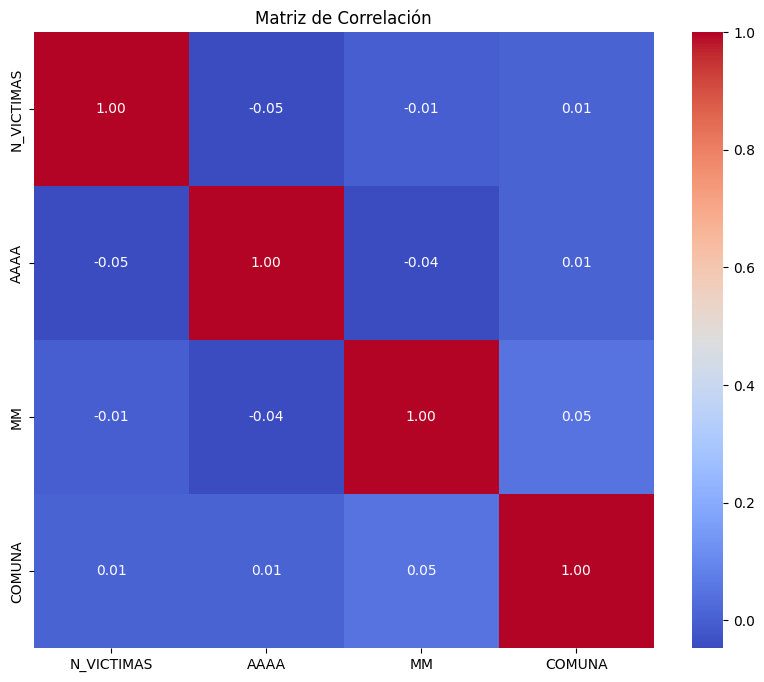

In [52]:
# Calcular la matriz de correlación
columnas_seleccionadas = ['N_VICTIMAS', 'AAAA', 'MM', 'COMUNA']
correlation_matrix = hechos[columnas_seleccionadas].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Para evaluar la relación entre variables categóricas uso una Tabla de contingencia (Tablas de frecuencia cruzada).
Una tabla de contingencia es una forma sencilla de visualizar la relación entre dos variables categóricas. Muestra la frecuencia con la que ocurren diferentes combinaciones de valores para ambas variables.

In [54]:
# Puedes crear una tabla de contingencia con la función pd.crosstab()
tabla_contingencia = pd.crosstab(hechos['TIPO_DE_CALLE'], hechos['PARTICIPANTES'])

# Imprimir la tabla de contingencia
tabla_contingencia

PARTICIPANTES,AUTO-AUTO,AUTO-CARGAS,AUTO-MOVIL,AUTO-OBJETO FIJO,AUTO-PASAJEROS,AUTO-SD,BICICLETA-AUTO,BICICLETA-CARGAS,BICICLETA-OTRO,BICICLETA-PASAJEROS,...,PEATON-BICICLETA,PEATON-CARGAS,PEATON-MOTO,PEATON-PASAJEROS,PEATON-SD,PEATON_MOTO-MOTO,SD-AUTO,SD-CARGAS,SD-MOTO,SD-SD
TIPO_DE_CALLE,,,,,,,,,,,,,,,,,,,,,
AUTOPISTA,5,1,0,4,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,2
AVENIDA,18,9,1,12,4,2,6,7,1,3,...,1,25,23,87,3,0,0,0,1,1
CALLE,3,3,0,2,2,0,2,3,0,5,...,4,7,5,16,0,1,2,1,0,1
GRAL PAZ,5,1,0,4,3,2,0,0,0,0,...,0,4,1,2,0,0,0,0,0,1


De la tabla de contingencia obtenida, podemos obtener varias conclusiones:

Frecuencia de accidentes por tipo de calle y participantes: Podemos ver cuántos accidentes involucran diferentes tipos de vehículos o participantes (por ejemplo, autos, bicicletas, peatones, etc.) en diferentes tipos de calles (por ejemplo, autopista, avenida, calle, etc.).

Patrones de accidentes por tipo de calle: Podemos observar si hay algún patrón en los tipos de accidentes que ocurren en diferentes tipos de calles. Por ejemplo, se ven más accidentes en avenida sin importar los participantes. Sin embargo en el caso de peaton-bicicleta la mayoria de las accidentes ocurren en calle.

Comparación de la gravedad de los accidentes: Podemos comparar la gravedad de los accidentes según el tipo de calle y los participantes involucrados. Por ejemplo, podemos ver si los accidentes en autopistas tienden a ser más graves que los accidentes en calles residenciales.

Identificación de patrones de seguridad vial: Analizando los datos, podemos identificar áreas o situaciones específicas que podrían requerir una mayor atención en términos de seguridad vial. Por ejemplo, si observamos que hay una alta frecuencia de accidentes de peatones-moto en ciertas avenidas, podríamos sugerir medidas específicas de seguridad en esas ubicaciones.


In [55]:
# Puedes crear una tabla de contingencia con la función pd.crosstab()
tabla_contingencia = pd.crosstab(hechos['VICTIMA'], hechos['ACUSADO'])

# Imprimir la tabla de contingencia
tabla_contingencia

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
VICTIMA,,,,,,,,,,
AUTO,31,0,14,0,3,21,1,9,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,83,2,78,25,8,40,4,46,9,0
MOVIL,0,0,1,0,0,0,0,1,0,0
OBJETO FIJO,1,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,77,5,38,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,1,0,0,0,0,0,0


La tabla proporciona información sobre el número de casos en los que diferentes tipos de vehículos o situaciones se ven involucrados como el acusado y la víctima en accidentes de tráfico. Aquí hay algunas conclusiones que se pueden extraer de estos datos:

Dominancia de accidentes de moto como acusado y víctima: Se observa una alta frecuencia de accidentes en los que la moto está involucrada, tanto como el acusado como la víctima. Esto sugiere que las motocicletas pueden ser una fuente significativa de accidentes de tráfico.

Accidentes entre peatones y vehículos: Hay un número significativo de accidentes que involucran a peatones como víctimas, especialmente en colisiones con motocicletas y automóviles.

Relativamente baja frecuencia de accidentes de bicicleta: Los accidentes de bicicleta parecen ser menos comunes en comparación con otros tipos de vehículos. Sin embargo, es importante tener en cuenta que esta baja frecuencia podría deberse a factores como el menor número de bicicletas en las calles o una menor gravedad de los accidentes.

Accidentes de carga involucrados: Menos comunes que los accidentes de moto o automóvil.

In [25]:
# Combinar los datasets "hechos" y "victimas" en uno solo
df = pd.merge(hechos, victimas, left_on='ID', right_on='ID_hecho')

In [26]:
# Seleccionar las columnas relevantes
variables = ['HH', 'COMUNA', 'EDAD']

In [27]:
# Filtrar el DataFrame para obtener solo estas columnas
df_selected = df[variables]

In [30]:
# Eliminar filas que contienen 'SD' en cualquier columna seleccionada
df_selected = df_selected.replace('SD', pd.NA).dropna()

In [31]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [32]:
# Convertir columnas relevantes a tipo numérico
df_selected = df_selected.apply(pd.to_numeric)

In [33]:
# Rellenar valores faltantes (si los hay) - en este caso, con la media de la columna
df_selected = df_selected.fillna(df_selected.mean())

In [34]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [35]:
# Aplicar PCA
pca = PCA(n_components=2)  # Seleccionamos 2 componentes principales para visualización
pca_result = pca.fit_transform(scaled_data)

In [36]:
# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [41]:
# Obtener las cargas (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [42]:
# Crear un DataFrame con las cargas y etiquetar las columnas originales
loadings_df = pd.DataFrame(data=loadings, index=df_selected.columns, columns=['PC1', 'PC2'])

In [43]:
print("Cargas de las variables originales en los componentes principales:")
print(loadings_df)

Cargas de las variables originales en los componentes principales:
             PC1       PC2
HH      0.739730  0.244114
COMUNA -0.339768  0.940578
EDAD    0.748560  0.185690


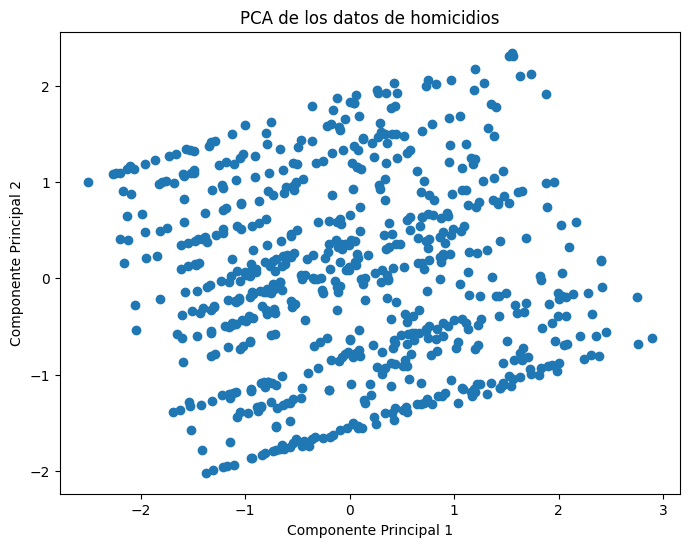

In [37]:
# Visualización de los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de los datos de homicidios')
plt.show()

In [38]:
# Varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.40704682 0.3257612 ]
